In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split


from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Credit_card_approval.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Problem Statement:

# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df1 = df.drop(['Loan_ID'],axis = 1)
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
df1.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Encoding

In [6]:
df1['Gender'].value_counts().to_dict()

{'Male': 489, 'Female': 112}

In [7]:
df1['Gender'].replace({'Male': 1, 'Female': 0},inplace = True)
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1.0,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1.0,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1.0,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1.0,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,1.0,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,1.0,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,1.0,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [8]:
df1.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
df1["Married"].value_counts().to_dict()

{'Yes': 398, 'No': 213}

In [10]:
df1["Married"].replace({'Yes': 1, 'No': 0},inplace = True)
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1.0,1.0,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1.0,1.0,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1.0,1.0,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1.0,0.0,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
df1['Dependents'].value_counts().to_dict()

{'0': 345, '1': 102, '2': 101, '3+': 51}

In [12]:
df1['Dependents'].replace({'0': 0, '1': 1, '2': 2, '3+': 3},inplace = True)
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1.0,1.0,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1.0,1.0,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1.0,1.0,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1.0,0.0,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,1.0,1.0,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,1.0,1.0,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,1.0,1.0,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [13]:
df1['Education'].value_counts().to_dict()

{'Graduate': 480, 'Not Graduate': 134}

In [14]:
df1['Education'].replace({'Graduate': 1, 'Not Graduate': 0},inplace = True)
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,1,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1.0,1.0,1.0,1,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1.0,1.0,0.0,1,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1.0,1.0,0.0,0,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1.0,0.0,0.0,1,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [15]:
df1['Self_Employed'].value_counts().to_dict()

{'No': 500, 'Yes': 82}

In [16]:
df1['Self_Employed'].replace({'No': 1, 'Yes': 0},inplace = True)
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,1,1.0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1.0,1.0,1.0,1,1.0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1.0,1.0,0.0,1,0.0,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1.0,1.0,0.0,0,1.0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1.0,0.0,0.0,1,1.0,6000,0.0,141.0,360.0,1.0,Urban,Y


In [17]:
df1['Property_Area'].value_counts().to_dict()

{'Semiurban': 233, 'Urban': 202, 'Rural': 179}

In [18]:
df1['Property_Area'].isna().sum()

0

In [19]:
df1 = pd.get_dummies(df1,columns = ['Property_Area'])
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,0.0,0.0,1,1.0,5849,0.0,NaN,360.0,1.0,Y,0,0,1
1,1.0,1.0,1.0,1,1.0,4583,1508.0,128.0,360.0,1.0,N,1,0,0
2,1.0,1.0,0.0,1,0.0,3000,0.0,66.0,360.0,1.0,Y,0,0,1
3,1.0,1.0,0.0,0,1.0,2583,2358.0,120.0,360.0,1.0,Y,0,0,1
4,1.0,0.0,0.0,1,1.0,6000,0.0,141.0,360.0,1.0,Y,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,1,1.0,2900,0.0,71.0,360.0,1.0,Y,1,0,0
610,1.0,1.0,3.0,1,1.0,4106,0.0,40.0,180.0,1.0,Y,1,0,0
611,1.0,1.0,1.0,1,1.0,8072,240.0,253.0,360.0,1.0,Y,0,0,1
612,1.0,1.0,2.0,1,1.0,7583,0.0,187.0,360.0,1.0,Y,0,0,1


In [20]:
df1['Loan_Status'].value_counts().to_dict()

{'Y': 422, 'N': 192}

In [21]:
df1['Loan_Status'].replace({'Y': 1, 'N': 0},inplace = True)
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,0.0,0.0,1,1.0,5849,0.0,NaN,360.0,1.0,1,0,0,1
1,1.0,1.0,1.0,1,1.0,4583,1508.0,128.0,360.0,1.0,0,1,0,0
2,1.0,1.0,0.0,1,0.0,3000,0.0,66.0,360.0,1.0,1,0,0,1
3,1.0,1.0,0.0,0,1.0,2583,2358.0,120.0,360.0,1.0,1,0,0,1
4,1.0,0.0,0.0,1,1.0,6000,0.0,141.0,360.0,1.0,1,0,0,1


In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   601 non-null    float64
 1   Married                  611 non-null    float64
 2   Dependents               599 non-null    float64
 3   Education                614 non-null    int64  
 4   Self_Employed            582 non-null    float64
 5   ApplicantIncome          614 non-null    int64  
 6   CoapplicantIncome        614 non-null    float64
 7   LoanAmount               592 non-null    float64
 8   Loan_Amount_Term         600 non-null    float64
 9   Credit_History           564 non-null    float64
 10  Loan_Status              614 non-null    int64  
 11  Property_Area_Rural      614 non-null    uint8  
 12  Property_Area_Semiurban  614 non-null    uint8  
 13  Property_Area_Urban      614 non-null    uint8  
dtypes: float64(8), int64(3), u

# missing values

In [23]:
df1.isna().sum()

Gender                     13
Married                     3
Dependents                 15
Education                   0
Self_Employed              32
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                 22
Loan_Amount_Term           14
Credit_History             50
Loan_Status                 0
Property_Area_Rural         0
Property_Area_Semiurban     0
Property_Area_Urban         0
dtype: int64

In [24]:
df1['Gender'].shape

(614,)

In [25]:
df1['Gender'].fillna(np.nan)

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
609    0.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Gender, Length: 614, dtype: float64

In [26]:
df1['Gender'].isna().sum()

13

In [27]:
df1['Gender'].mode()[0]

1.0

In [28]:
df1['Gender'].replace({"np.nan" : df1['Gender'].mode()[0]},inplace = True)
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,0.0,0.0,1,1.0,5849,0.0,NaN,360.0,1.0,1,0,0,1
1,1.0,1.0,1.0,1,1.0,4583,1508.0,128.0,360.0,1.0,0,1,0,0
2,1.0,1.0,0.0,1,0.0,3000,0.0,66.0,360.0,1.0,1,0,0,1
3,1.0,1.0,0.0,0,1.0,2583,2358.0,120.0,360.0,1.0,1,0,0,1
4,1.0,0.0,0.0,1,1.0,6000,0.0,141.0,360.0,1.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,1,1.0,2900,0.0,71.0,360.0,1.0,1,1,0,0
610,1.0,1.0,3.0,1,1.0,4106,0.0,40.0,180.0,1.0,1,1,0,0
611,1.0,1.0,1.0,1,1.0,8072,240.0,253.0,360.0,1.0,1,0,0,1
612,1.0,1.0,2.0,1,1.0,7583,0.0,187.0,360.0,1.0,1,0,0,1


In [29]:
df1['Gender'].isna().sum()

13

In [30]:
df1['Gender'].fillna(df1['Gender'].mode()[0],inplace = True)
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,0.0,0.0,1,1.0,5849,0.0,NaN,360.0,1.0,1,0,0,1
1,1.0,1.0,1.0,1,1.0,4583,1508.0,128.0,360.0,1.0,0,1,0,0
2,1.0,1.0,0.0,1,0.0,3000,0.0,66.0,360.0,1.0,1,0,0,1
3,1.0,1.0,0.0,0,1.0,2583,2358.0,120.0,360.0,1.0,1,0,0,1
4,1.0,0.0,0.0,1,1.0,6000,0.0,141.0,360.0,1.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,1,1.0,2900,0.0,71.0,360.0,1.0,1,1,0,0
610,1.0,1.0,3.0,1,1.0,4106,0.0,40.0,180.0,1.0,1,1,0,0
611,1.0,1.0,1.0,1,1.0,8072,240.0,253.0,360.0,1.0,1,0,0,1
612,1.0,1.0,2.0,1,1.0,7583,0.0,187.0,360.0,1.0,1,0,0,1


In [31]:
df1['Gender'].isna().sum()

0

In [32]:
df1['Married'].isna().sum()

3

In [33]:
df1['Married'].fillna(df1['Married'].mode()[0],inplace = True)
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,0.0,0.0,1,1.0,5849,0.0,NaN,360.0,1.0,1,0,0,1
1,1.0,1.0,1.0,1,1.0,4583,1508.0,128.0,360.0,1.0,0,1,0,0
2,1.0,1.0,0.0,1,0.0,3000,0.0,66.0,360.0,1.0,1,0,0,1
3,1.0,1.0,0.0,0,1.0,2583,2358.0,120.0,360.0,1.0,1,0,0,1
4,1.0,0.0,0.0,1,1.0,6000,0.0,141.0,360.0,1.0,1,0,0,1


In [34]:
df1['Married'].isna().sum()

0

In [35]:
df1['Dependents'].fillna(df1['Dependents'].median(),inplace = True)
df1.isna().sum()

Gender                      0
Married                     0
Dependents                  0
Education                   0
Self_Employed              32
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                 22
Loan_Amount_Term           14
Credit_History             50
Loan_Status                 0
Property_Area_Rural         0
Property_Area_Semiurban     0
Property_Area_Urban         0
dtype: int64

In [36]:
df1['Self_Employed'].fillna(df1['Self_Employed'].median(),inplace = True)
df1['Self_Employed'].isna().sum()

0

In [37]:
df1['LoanAmount'].fillna(df1['LoanAmount'].median(),inplace = True)
df1['Loan_Amount_Term'].fillna(df1['Loan_Amount_Term'].median(),inplace = True)
df1['Credit_History'].fillna(df1['Credit_History'].median(),inplace = True)

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   614 non-null    float64
 1   Married                  614 non-null    float64
 2   Dependents               614 non-null    float64
 3   Education                614 non-null    int64  
 4   Self_Employed            614 non-null    float64
 5   ApplicantIncome          614 non-null    int64  
 6   CoapplicantIncome        614 non-null    float64
 7   LoanAmount               614 non-null    float64
 8   Loan_Amount_Term         614 non-null    float64
 9   Credit_History           614 non-null    float64
 10  Loan_Status              614 non-null    int64  
 11  Property_Area_Rural      614 non-null    uint8  
 12  Property_Area_Semiurban  614 non-null    uint8  
 13  Property_Area_Urban      614 non-null    uint8  
dtypes: float64(8), int64(3), u

In [38]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   614 non-null    float64
 1   Married                  614 non-null    float64
 2   Dependents               614 non-null    float64
 3   Education                614 non-null    int64  
 4   Self_Employed            614 non-null    float64
 5   ApplicantIncome          614 non-null    int64  
 6   CoapplicantIncome        614 non-null    float64
 7   LoanAmount               614 non-null    float64
 8   Loan_Amount_Term         614 non-null    float64
 9   Credit_History           614 non-null    float64
 10  Loan_Status              614 non-null    int64  
 11  Property_Area_Rural      614 non-null    uint8  
 12  Property_Area_Semiurban  614 non-null    uint8  
 13  Property_Area_Urban      614 non-null    uint8  
dtypes: float64(8), int64(3), u

# Feature selection

In [39]:
df1.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
Gender,1.000000,0.364569,0.172914,-0.045364,0.000525,0.058809,0.082912,0.106904,-0.074030,0.009170,0.017987,0.080283,-0.108623,0.034530
Married,0.364569,1.000000,0.334216,-0.012304,-0.004489,0.051708,0.075948,0.146546,-0.100912,0.010938,0.091478,-0.006805,0.005845,0.000546
Dependents,0.172914,0.334216,1.000000,-0.055752,-0.056798,0.118202,0.030430,0.163103,-0.103864,-0.040160,0.010118,-0.000816,0.001924,-0.001198
Education,-0.045364,-0.012304,-0.055752,1.000000,-0.010383,0.140760,0.062290,0.168759,0.073928,0.073658,0.085884,-0.077520,0.039410,0.034279
Self_Employed,0.000525,-0.004489,-0.056798,-0.010383,1.000000,-0.127180,0.016100,-0.115100,0.033739,0.001550,0.003700,-0.022065,-0.008710,0.030338
ApplicantIncome,0.058809,0.051708,0.118202,0.140760,-0.127180,1.000000,-0.116605,0.565181,-0.046531,-0.018615,-0.004710,0.015829,-0.014246,-0.000598
CoapplicantIncome,0.082912,0.075948,0.030430,0.062290,0.016100,-0.116605,1.000000,0.189218,-0.059383,0.011134,-0.059187,0.005329,-0.027044,0.022776
LoanAmount,0.106904,0.146546,0.163103,0.168759,-0.115100,0.565181,0.189218,1.000000,0.036960,-0.000607,-0.033214,0.043467,-0.005804,-0.036050
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,0.073928,0.033739,-0.046531,-0.059383,0.036960,1.000000,-0.004705,-0.022549,0.034321,0.059141,-0.094279
Credit_History,0.009170,0.010938,-0.040160,0.073658,0.001550,-0.018615,0.011134,-0.000607,-0.004705,1.000000,0.540556,-0.020906,0.035976,-0.016934


# Multicollinearity:

<AxesSubplot:>

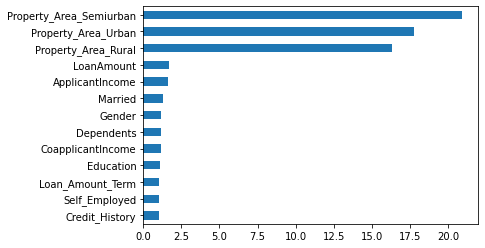

In [40]:
x = df1.drop('Loan_Status',axis = 1)
vif_list = []
for i in range(x.shape[1]):
    vif = variance_inflation_factor(x.to_numpy(),i)
    vif_list.append(vif)

S1 = pd.Series(vif_list,index = x.columns)
S1.sort_values().plot(kind = 'barh')

# train test split

In [41]:
x = df1.drop('Loan_Status',axis = 1)
y = df1['Loan_Status']

In [42]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 100)
x_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
574,1.0,1.0,3.0,1,1.0,6406,0.0,150.0,360.0,1.0,0,1,0
171,1.0,1.0,3.0,1,1.0,51763,0.0,700.0,300.0,1.0,0,0,1
327,1.0,1.0,0.0,1,0.0,5818,2160.0,184.0,360.0,1.0,0,1,0
252,1.0,0.0,0.0,0,0.0,2583,2167.0,104.0,360.0,1.0,1,0,0
3,1.0,1.0,0.0,0,1.0,2583,2358.0,120.0,360.0,1.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1.0,1.0,1,1.0,1782,2232.0,107.0,360.0,1.0,1,0,0
53,1.0,1.0,2.0,1,1.0,4616,0.0,134.0,360.0,1.0,0,0,1
350,1.0,1.0,0.0,1,1.0,9083,0.0,228.0,360.0,1.0,0,1,0
79,1.0,1.0,3.0,0,0.0,3333,2166.0,130.0,360.0,1.0,0,1,0


In [43]:
y_train

574    0
171    1
327    1
252    1
3      1
      ..
578    1
53     0
350    1
79     1
520    1
Name: Loan_Status, Length: 491, dtype: int64

In [44]:
x_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
253,1.0,1.0,1.0,0,1.0,2661,7101.0,279.0,180.0,1.0,0,1,0
506,1.0,1.0,0.0,1,1.0,20833,6667.0,480.0,360.0,1.0,0,0,1
365,1.0,0.0,0.0,0,1.0,6216,0.0,133.0,360.0,1.0,1,0,0
265,1.0,0.0,0.0,1,1.0,4095,3447.0,151.0,360.0,1.0,1,0,0
260,1.0,1.0,1.0,1,1.0,6083,4250.0,330.0,360.0,1.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.0,0.0,0.0,1,1.0,1500,1800.0,103.0,360.0,0.0,0,1,0
219,0.0,1.0,2.0,1,1.0,4283,2383.0,127.0,360.0,1.0,0,1,0
154,1.0,0.0,0.0,1,1.0,3254,0.0,50.0,360.0,1.0,0,0,1
370,0.0,0.0,0.0,1,0.0,15759,0.0,55.0,360.0,1.0,0,1,0


# Model Training

In [45]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

# Model Evaluation

In [46]:
# Training Data
y_pred = model.predict(x_train)

mse = mean_squared_error(y_train,y_pred)
print('MSE :',mse)

rmse = np.sqrt(mse)
print('RMSE :',rmse)

mae = mean_absolute_error(y_train,y_pred)
print('MAE :',mae)

r2 = r2_score(y_train,y_pred)
print('R2 :',r2)

adjusted_r2_score = 1-((1-r2)*(1338-1)/(1338-10-1))
adjusted_r2_score


MSE : 0.13296225817167284
RMSE : 0.36463990205636143
MAE : 0.2686197697244951
R2 : 0.3584959541649644


0.3536617111669611

In [47]:
# Testing Data
y_test_pred = model.predict(x_test)

mse = mean_squared_error(y_test,y_test_pred)
print('MSE :',mse)

rmse = np.sqrt(mse)
print('RMSE :',rmse)

mae = mean_absolute_error(y_test,y_test_pred)
print('MAE :',mae)

r2 = r2_score(y_test,y_test_pred)
print('R2 :',r2)
      
adjusted_r2_score = 1-((1-r2)*(1338-1)/(1338-10-1))
adjusted_r2_score

MSE : 0.20378556233183096
RMSE : 0.45142614272085635
MAE : 0.34524423626063
R2 : 0.1435911743004804


0.13713745293123003

In [48]:
df1.head(1).T

,0
Gender,1.0
Married,0.0
Dependents,0.0
Education,1.0
Self_Employed,1.0
ApplicantIncome,5849.0
CoapplicantIncome,0.0
LoanAmount,128.0
Loan_Amount_Term,360.0
Credit_History,1.0


In [49]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
Gender	1.0
Married	0.0
Dependents	0.0
Education	1.0
Self_Employed	1.0
ApplicantIncome	5849.0
CoapplicantIncome	0.0
LoanAmount	128.0
Loan_Amount_Term	360.0
Credit_History	1.0

## one line testing

In [53]:
Gender = "Female"
Married = "No"
Dependents = 3
Education = "Not Graduate"
Self_Employed = "Yes"
ApplicantIncome = 6851.0
CoapplicantIncome = 1246.0
LoanAmount = 133.0
Loan_Amount_Term = 180.0
Credit_History = 1.0
Property_Area = "Urban"

In [54]:
lebel_encoded_columns = {'Gender' : {'Male': 1, 'Female': 0} ,
                        'Married' : {'Yes': 1, 'No': 0} ,
                        'Education' : {'Graduate': 1, 'Not Graduate': 0} ,
                        'Self_Employed' : {'No': 1, 'Yes': 0} ,
                        "columns" : list(x.columns)}
lebel_encoded_columns

{'Gender': {'Male': 1, 'Female': 0},
 'Married': {'Yes': 1, 'No': 0},
 'Education': {'Graduate': 1, 'Not Graduate': 0},
 'Self_Employed': {'No': 1, 'Yes': 0},
 'columns': ['Gender',
  'Married',
  'Dependents',
  'Education',
  'Self_Employed',
  'ApplicantIncome',
  'CoapplicantIncome',
  'LoanAmount',
  'Loan_Amount_Term',
  'Credit_History',
  'Property_Area_Rural',
  'Property_Area_Semiurban',
  'Property_Area_Urban']}

In [52]:
lebel_encoded_columns['Gender'][Gender]

0

In [61]:
column_name = x.columns
column_name

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

In [62]:
Property_Area1 = "Property_Area_" + Property_Area
Property_Area_index = np.where(column_name == Property_Area1)[0][0]
Property_Area_index

12

In [63]:
test_array = np.zeros(x.shape[1],dtype = int)
test_array

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [64]:
test_array = np.zeros(x.shape[1])

test_array[0] = lebel_encoded_columns['Gender'][Gender]
test_array[1] = lebel_encoded_columns['Married'][Married]
test_array[2] = Dependents
test_array[3] = lebel_encoded_columns['Education'][Education]
test_array[4] = lebel_encoded_columns['Self_Employed'][Self_Employed]
test_array[5] = ApplicantIncome
test_array[6] = CoapplicantIncome
test_array[7] = LoanAmount
test_array[8] = Loan_Amount_Term
test_array[9] = Credit_History
test_array[Property_Area_index] = 1 

test_array

array([0.000e+00, 0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 6.851e+03,
       1.246e+03, 1.330e+02, 1.800e+02, 1.000e+00, 0.000e+00, 0.000e+00,
       1.000e+00])

In [65]:
model.predict ([test_array])

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.68964845])

In [66]:
import pickle

with open("Linear_reg_cred_approval.pkl",'wb') as f:
    pickle.dump(model,f)

In [67]:
import json

with open("Json_files.json","w") as f:
    json.dump(lebel_encoded_columns,f)